## Author# Ganesh Kale
## Project Milestone# 2
## Date# Oct 03, 2021

### Project Overview:

Project Overview:
House Prices in USA are booming, and house prices will continue to race ahead, at nearly twice the pace predicted before this year. This is what we hear or read when talk about housing market in USA. Buying house is very critical job, one should be aware of lots of things before buying house and when buying house nobody sure about when is the right time to buy house and wants to have some tool that would consider all the factors determining house price and predict the house price. Predicting the house price is challenging but doable and with help of machine learning algorithms this can be achieved.

This is the topic chosen for the final project to make data ready by collecting from different sources and cleaning, transforming, and merging all these data to make it final dataset in the ready format for machine learning algorithms so predicting house price model can be developed by training and validating on housing market dataset.
To build predicting house price model, we should consider different factors such as house information, and facilities available in neighborhood such school, hospitals etc.
As part of this exercise, Austin, Texas housing market data will be collected from 3 difference sources such as csv file with house related information, json file for hospital in neighborhood and tabular data for school information from website.

1.	CSV File – The csv file is acquired from kaggele website, this data set have Austin TX area house information, such as address, year built, sale price, No. of bedroom, bathrooms, lot area etc. Please refer data dictionary for more information about data.
Link to Data Set - (https://www.kaggle.com/ericpierce/austinhousingprices)


### Import required packages

In [1]:
import numpy as np  # for numeric operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization
import random   # for generating random numbers
import missingno as msno  # display null values

from sklearn.preprocessing import LabelEncoder   # to encode categorical data type

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Load the data set

In [2]:
# load csv file using pandas read_csv and parse sale date column

homes = pd.read_csv("Data/austinHousingData.csv",parse_dates=['latest_saledate'])

In [3]:
# display shape and head of the data set

homes.shape
homes.head()

(15171, 29)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories
0,111373431,pflugerville,14424 Lake Victor Dr,78660.0,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",6011.0,2601,3.0,4,2
1,120900430,pflugerville,1104 Strickling Dr,78660.0,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,2020-10-13,10,2020,Agent Provided,6185.0,1768,2.0,4,1
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660.0,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,2019-07-31,7,2019,Agent Provided,7840.0,1478,2.0,3,1
3,120901374,pflugerville,1025 Strickling Dr,78660.0,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,4,2018-08-08,8,2018,Agent Provided,6098.0,1678,2.0,3,1
4,60134862,pflugerville,15005 Donna Jane Loop,78660.0,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,3,2018-10-31,10,2018,Agent Provided,6708.0,2132,3.0,3,2


In [4]:
# display data set information - data types and count

homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   zpid               15171 non-null  int64         
 1   city               15170 non-null  object        
 2   streetAddress      15167 non-null  object        
 3   zipcode            15167 non-null  float64       
 4   description        15170 non-null  object        
 5   latitude           15171 non-null  float64       
 6   longitude          15171 non-null  float64       
 7   propertyTaxRate    15171 non-null  float64       
 8   garageSpaces       15171 non-null  int64         
 9   hasAssociation     15171 non-null  bool          
 10  hasCooling         15171 non-null  bool          
 11  hasGarage          15171 non-null  bool          
 12  hasHeating         15171 non-null  bool          
 13  hasSpa             15171 non-null  bool          
 14  hasVie

### Data Dictionary – 

CSV File – Houses Information:
The Austin TX housing data was originally obtained from Zillow and used in Kaggle competition. The data consists of around 29 different features of houses and have around 15K houses information.
Dataset feature details - 
1. zpid - Zillow Property Id
2. city - City name
3. streetAddress - Address of House/Property
4. zipcode - Zip code of property
5. description - Property Description
6. latitude - Coordinates - location
7. longitude - Coordinates - location
8. propertyTaxRate - Property Tax rate in that area
9. garageSpaces - How many cars parking spaces in garage
10. hasAssociation - Is HOA there or not
11. hasCooling - AC units are installed in house or not
12. hasGarage - Property has garage or not
13. hasHeating - Property has heating system or not
14. hasSpa - Property has spa or not
15. hasView - Property has view or not
16. homeType - Property is single family or apartment or townhouse etc
17. parkingSpaces - How many parking spaces
18. yearBuilt - What year property was built
19. latestPrice - WHat is latest house price
20. numPriceChanges - How many times property prices changes since listed 21. latest_saledate - Date of last sold
22. latest_salemonth - Month of last sold
23. latest_saleyear - Year of the last sold
24. latestPriceSource - The party provided the price of the property
25. lotSizeSqFt - Lot size in sq ft
26. livingAreaSqFt - Living area in sq ft
27. numOfBathrooms - Number of bathrooms
28. numOfBedrooms - Number of bedrooms
29. numOfStories - number of stories

### Data Cleaning or Formatting Steps - 

1. Find the missing or null values
2. Handle the missing values
3. Check for duplicates and handle them if any
4. Identify outliers or bad data and handle them
5. Add or remove features/columns
6. format data - format categorical data to numeric

### Missing Values

In [5]:
# find missing or nan values in data set

homes.isna().sum()

# based on the below numbers it seems there are few columns such as street address, city, zipcode, 
# latest price source having null values

zpid                  0
city                  1
streetAddress         4
zipcode               4
description           1
latitude              0
longitude             0
propertyTaxRate       0
garageSpaces          0
hasAssociation        0
hasCooling            0
hasGarage             0
hasHeating            0
hasSpa                0
hasView               0
homeType              0
parkingSpaces         0
yearBuilt             0
latestPrice           0
numPriceChanges       0
latest_saledate       1
latest_salemonth      0
latest_saleyear       0
latestPriceSource    46
lotSizeSqFt           0
livingAreaSqFt        0
numOfBathrooms        0
numOfBedrooms         0
numOfStories          0
dtype: int64

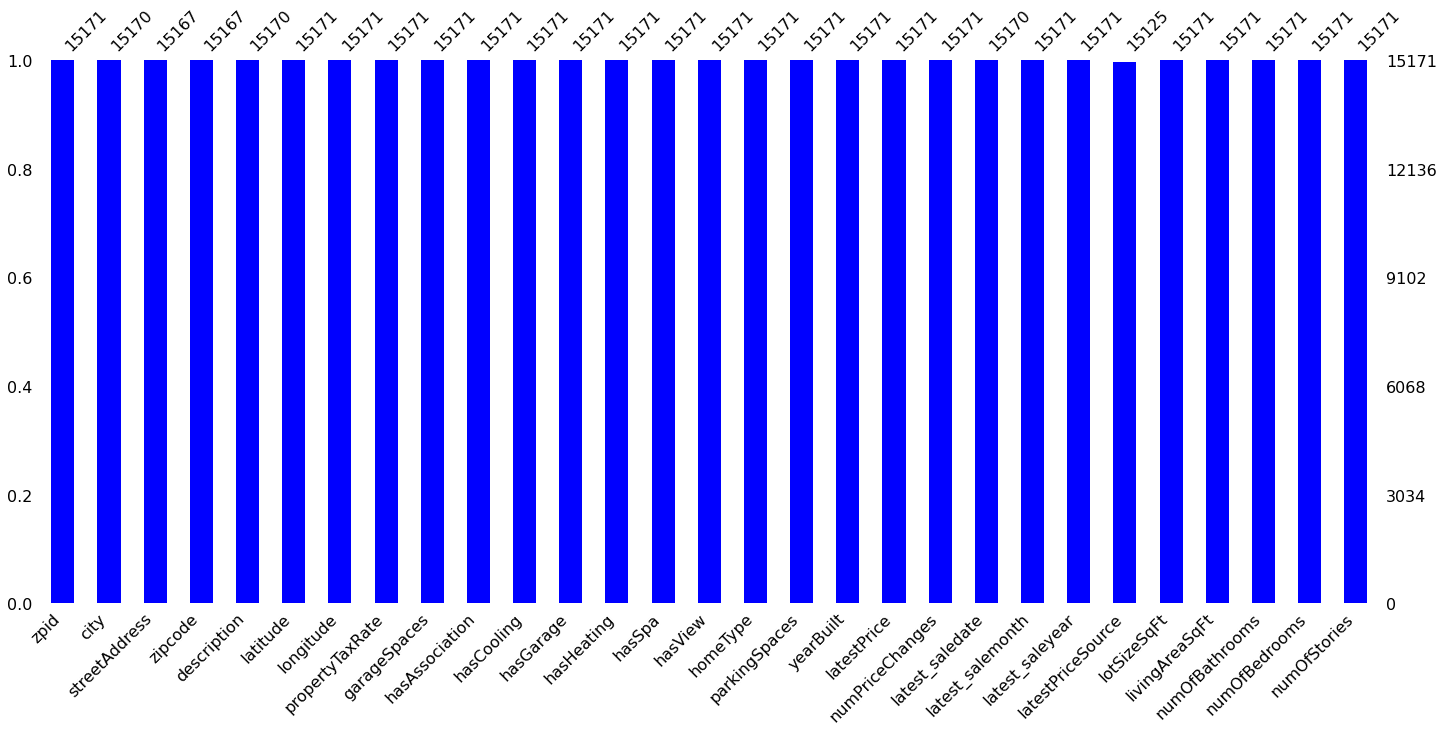

In [6]:
# display missing or nan values from the data set

msno.bar(homes, color = 'b');

#### Handle the missing values - 

- zipcode - since the zipcode is key feature we need to join with other data sets so we are going to drop numm values
- latestPriceSource - this feature provides home price source and has more missing values, we are going to drop this column
- since it is not required for pridicting house prices

In [7]:
# drop na values

homes.dropna(axis=0, how='any', inplace = True)

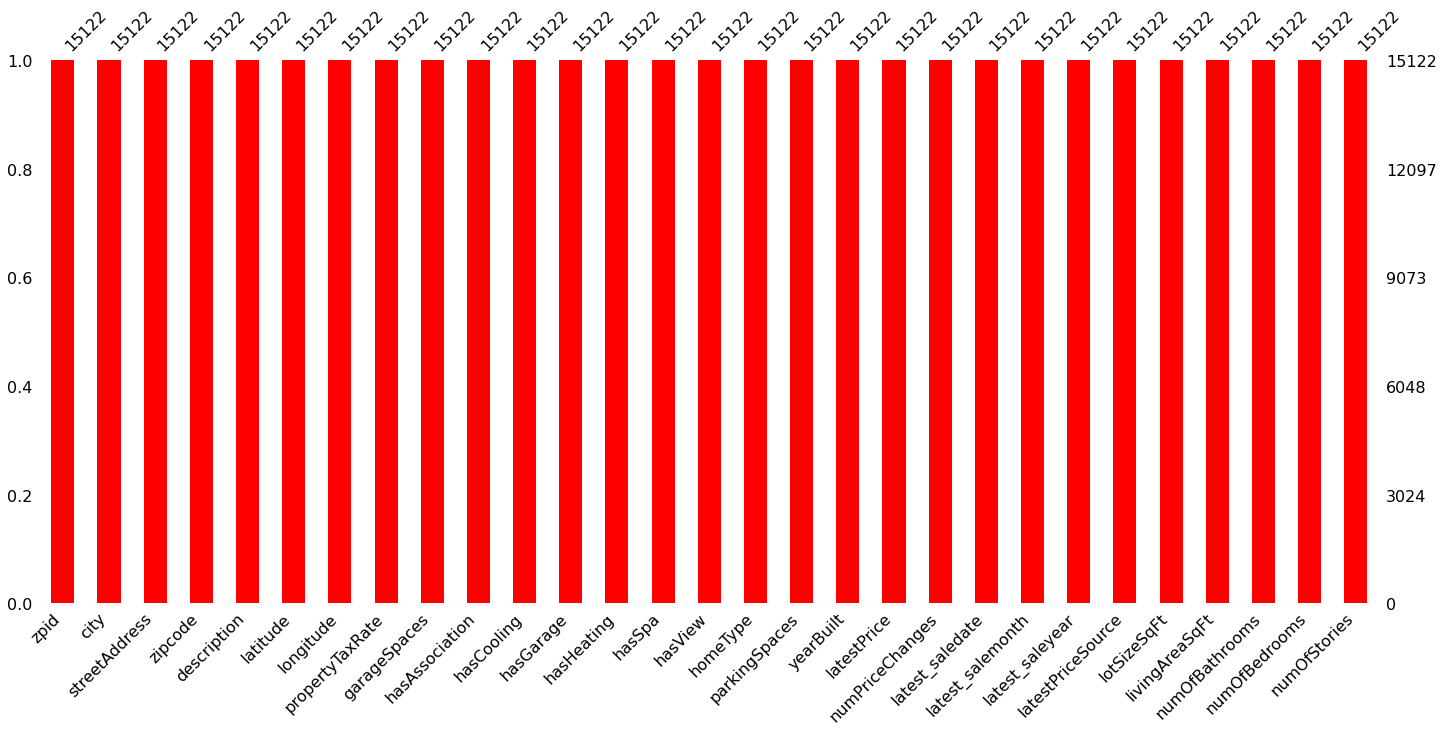

In [8]:
# display missing or nan values from the data set after removing them

msno.bar(homes, color = 'r');

### Duplicate Values

In [9]:
# check for any duplicate rows in dataset

dupes = homes.duplicated().sum()

# there are no duplicates in data set

print(f"There are {dupes} duplicates in the dataset")

There are 0 duplicates in the dataset


In [10]:
# check duplicate address exist or not

homes.duplicated(subset=['streetAddress','zipcode','city'],keep='first').sum()

# there are 7 homes with duplicate addresses, we are going to keep only 7 and remove duplicate 7 addresses

7

In [11]:
# display duplicate addresses

homes.loc[homes.duplicated(subset=['streetAddress','zipcode','city'],keep=False),:]

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories
1462,2111911001,austin,2604 Arion Cir,78730.0,"2604 Arion Cir, Austin, TX 78730 is a single f...",30.335613,-97.829010,1.98,0,True,...,3,2018-08-11,8,2018,Agent Provided,17424.0,3600,4.0,4,1
1469,125904436,austin,2604 Arion Cir,78730.0,"Completed June 2017, this stunning 1-story sto...",30.335608,-97.829002,1.98,3,True,...,1,2018-08-11,8,2018,Agent Provided,17424.0,3629,4.0,4,1
1914,250400973,austin,238 Lavaca Heights Dr,78737.0,"238 Lavaca Heights Dr, Austin, TX 78737 is a s...",30.183710,-97.988678,2.01,3,True,...,1,2020-04-02,4,2020,Agent Provided,8276.0,1913,2.0,3,1
4201,2088737292,austin,238 Lavaca Heights Dr,78737.0,New construction home in Belterra is the perfe...,30.182819,-97.986626,2.01,3,True,...,2,2020-04-02,4,2020,Agent Provided,8276.0,1913,2.0,3,1
4703,305425899,austin,4716 Amarra Dr,78735.0,A private oasis awaits you as you enter 4716 A...,30.268053,-97.883705,1.98,0,True,...,1,2020-08-10,8,2020,Agent Provided,87991.2,4853,6.0,4,1
5048,89548952,austin,11209 Lost Maples Trl,78748.0,South Austin low maintenance living. This town...,30.155748,-97.832542,1.98,0,True,...,1,2018-04-27,4,2018,Agent Provided,5140.0,1236,3.0,2,2
5341,2088738491,austin,4716 Amarra Dr,78735.0,"4716 Amarra Dr, Austin, TX 78735 is a vacant l...",30.267832,-97.883476,1.98,4,True,...,1,2020-05-05,5,2020,Kuper Sotheby's Itl Rlty,87120.0,4853,6.0,4,1
5627,2092180147,austin,10816 Mickelson Dr,78747.0,"10816 Mickelson Dr, Austin, TX 78747 is a sing...",30.133886,-97.774887,1.98,2,True,...,3,2019-08-09,8,2019,Agent Provided,8999.0,2690,3.0,5,2
5690,251030610,austin,10816 Mickelson Dr,78747.0,"10816 Mickelson Dr, Austin, TX 78747 is a sing...",30.133755,-97.775002,1.98,0,True,...,1,2019-08-09,8,2019,Broker Provided,8999.0,2690,3.0,5,2
6594,89547387,austin,2404 Independence Dr,78745.0,Don't miss your chance to live in this beautif...,30.214905,-97.806824,1.98,1,True,...,4,2020-06-05,6,2020,Agent Provided,9016.0,1781,2.0,4,1


In [12]:
# drop duplicate addresses and keep just one for each

homes.drop_duplicates(subset=['streetAddress','zipcode','city'],keep='first',inplace=True)

In [13]:
# display shape and head of the data set

homes.shape
homes.head()

(15115, 29)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories
0,111373431,pflugerville,14424 Lake Victor Dr,78660.0,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",6011.0,2601,3.0,4,2
1,120900430,pflugerville,1104 Strickling Dr,78660.0,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,2020-10-13,10,2020,Agent Provided,6185.0,1768,2.0,4,1
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660.0,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,2019-07-31,7,2019,Agent Provided,7840.0,1478,2.0,3,1
3,120901374,pflugerville,1025 Strickling Dr,78660.0,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,4,2018-08-08,8,2018,Agent Provided,6098.0,1678,2.0,3,1
4,60134862,pflugerville,15005 Donna Jane Loop,78660.0,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,3,2018-10-31,10,2018,Agent Provided,6708.0,2132,3.0,3,2


### Feature Engineering - Add, update or remove features

There are few columns in the dataset which are not required so we are going to remove them, create new feature based on existing features.
- columns to remove: 
1. zpid - this is zellow id but not required for prediction model
2. description  - this describes the home but we have all information about home as separate feature so not required
3. latitude - this is location coordiantes butnot required for model
4. longitude - this is location coordiantes butnot required for model
5. latest_salemonth - since we have sale year so this is not required
6. latest_date - since we have sale year so this is not required
7. latestPriceSource - we had lots of nulls in this feature and it does not required for model

- New Columns:
1. Total Area Sqft - New feature by adding lotSizeSqFt and livingAreaSqFt
2. home_age - Age of house by subtracting year built from current year 


In [14]:
# drop unwanted columns from dataset

homes.drop(['zpid','description','latitude','longitude','latest_saledate', 'latest_salemonth','latestPriceSource'],
           axis=1, inplace=True)

In [15]:
# create new feature for total area

homes['total_area_sqft'] = homes['lotSizeSqFt'] + homes['livingAreaSqFt']

In [16]:
# new feature age of house 

homes['home_age'] = 2021 - homes['yearBuilt']

In [17]:
# display shape and head of the data set

homes.shape
homes.head()

(15115, 24)

,city,streetAddress,zipcode,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,...,latestPrice,numPriceChanges,latest_saleyear,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories,total_area_sqft,home_age
0,pflugerville,14424 Lake Victor Dr,78660.0,1.98,2,True,True,True,True,False,...,305000,5,2019,6011.0,2601,3.0,4,2,8612.0,9
1,pflugerville,1104 Strickling Dr,78660.0,1.98,2,True,True,True,True,False,...,295000,1,2020,6185.0,1768,2.0,4,1,7953.0,8
2,pflugerville,1408 Fort Dessau Rd,78660.0,1.98,0,True,True,False,True,False,...,256125,1,2019,7840.0,1478,2.0,3,1,9318.0,3
3,pflugerville,1025 Strickling Dr,78660.0,1.98,2,True,True,True,True,False,...,240000,4,2018,6098.0,1678,2.0,3,1,7776.0,8
4,pflugerville,15005 Donna Jane Loop,78660.0,1.98,0,True,True,False,True,False,...,239900,3,2018,6708.0,2132,3.0,3,2,8840.0,19


### Outliers and Bad Data:

We will check outliers or bad data by plotting each feature based on their data type

In [18]:
# display dataset datatype info

homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15115 entries, 0 to 15170
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             15115 non-null  object 
 1   streetAddress    15115 non-null  object 
 2   zipcode          15115 non-null  float64
 3   propertyTaxRate  15115 non-null  float64
 4   garageSpaces     15115 non-null  int64  
 5   hasAssociation   15115 non-null  bool   
 6   hasCooling       15115 non-null  bool   
 7   hasGarage        15115 non-null  bool   
 8   hasHeating       15115 non-null  bool   
 9   hasSpa           15115 non-null  bool   
 10  hasView          15115 non-null  bool   
 11  homeType         15115 non-null  object 
 12  parkingSpaces    15115 non-null  int64  
 13  yearBuilt        15115 non-null  int64  
 14  latestPrice      15115 non-null  int64  
 15  numPriceChanges  15115 non-null  int64  
 16  latest_saleyear  15115 non-null  int64  
 17  lotSizeSqFt 

In [19]:
# plot histogram and box plot for all numerical data types and bar chart for categorical data type features

# store numerical columns and categorical columns in separate variables

numeric_cols = homes.select_dtypes(['int64','float64']).columns
numeric_cols = numeric_cols.drop(['lotSizeSqFt','total_area_sqft'])

cat_cols = homes.select_dtypes(['object','bool']).columns
cat_cols = cat_cols.drop('streetAddress')

# display numeric and categorical columns
numeric_cols
cat_cols

Index(['zipcode', 'propertyTaxRate', 'garageSpaces', 'parkingSpaces',
       'yearBuilt', 'latestPrice', 'numPriceChanges', 'latest_saleyear',
       'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories',
       'home_age'],
      dtype='object')

Index(['city', 'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating',
       'hasSpa', 'hasView', 'homeType'],
      dtype='object')

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='zipcode', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: zipcode')

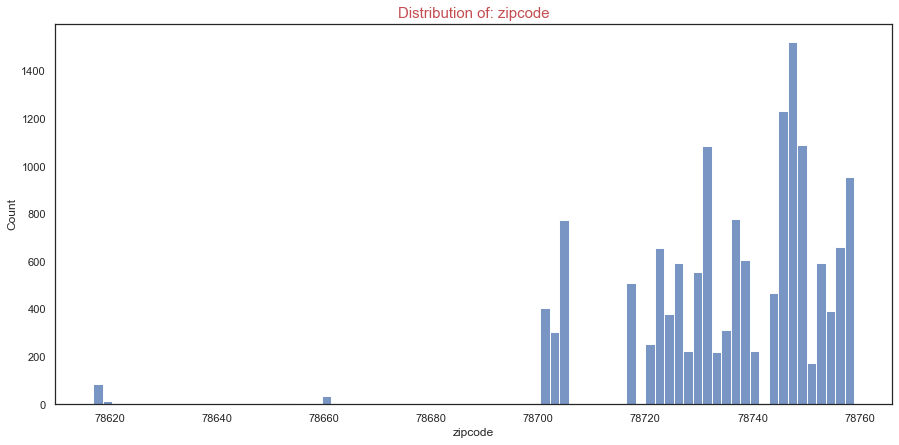

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='propertyTaxRate', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: propertyTaxRate')

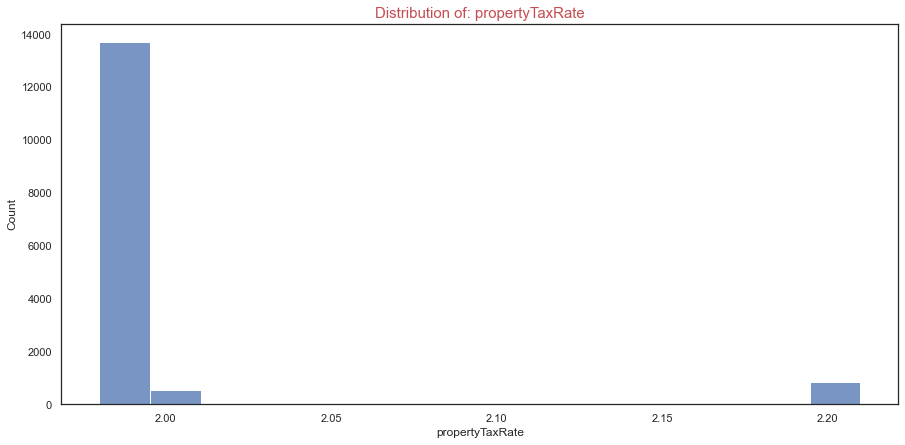

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='garageSpaces', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: garageSpaces')

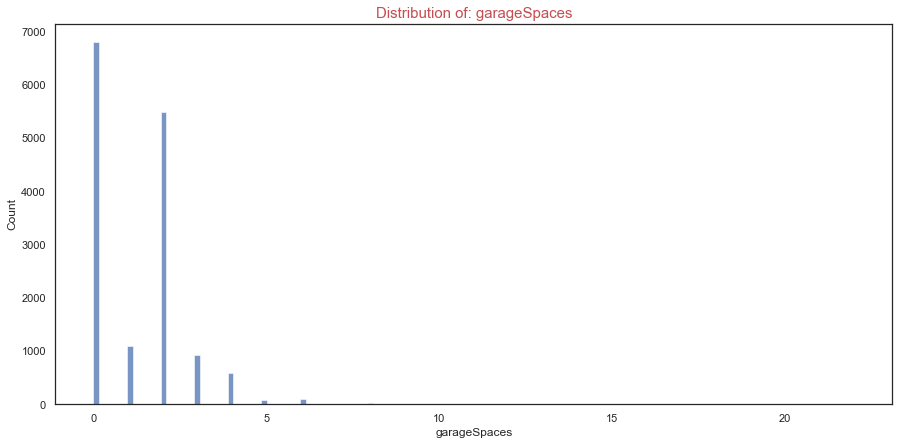

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='parkingSpaces', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: parkingSpaces')

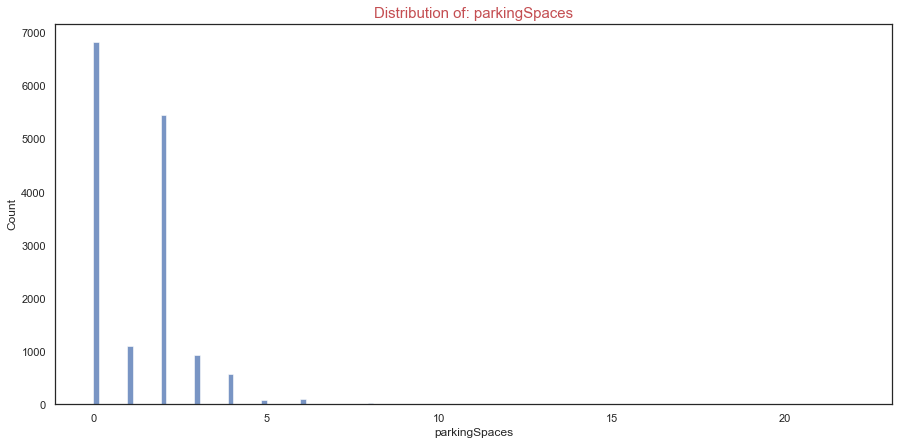

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='yearBuilt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: yearBuilt')

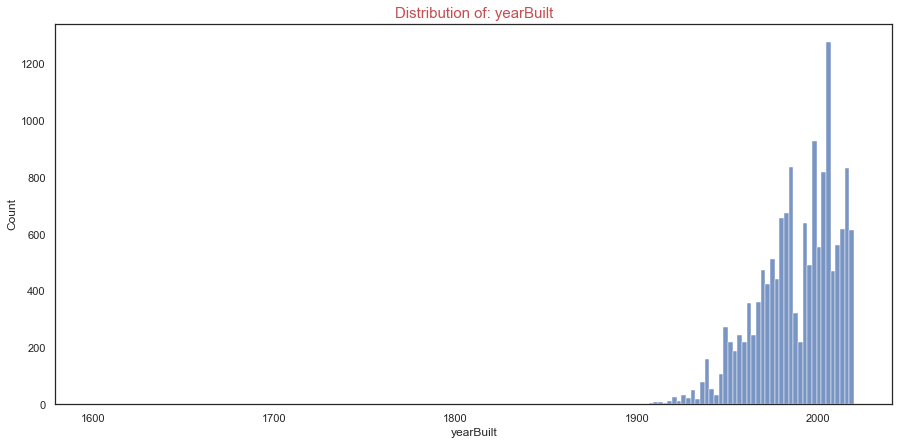

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='latestPrice', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: latestPrice')

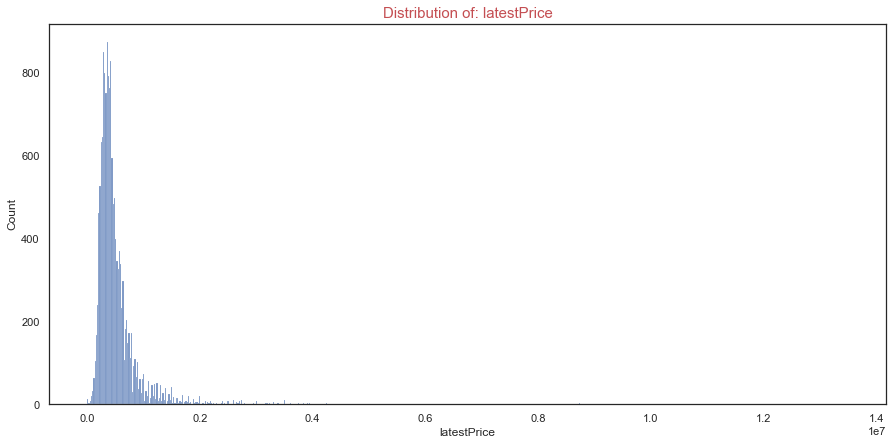

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='numPriceChanges', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: numPriceChanges')

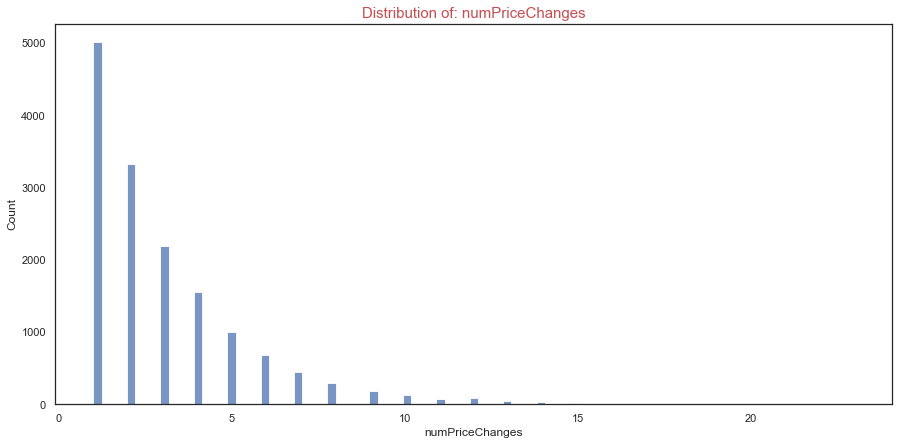

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='latest_saleyear', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: latest_saleyear')

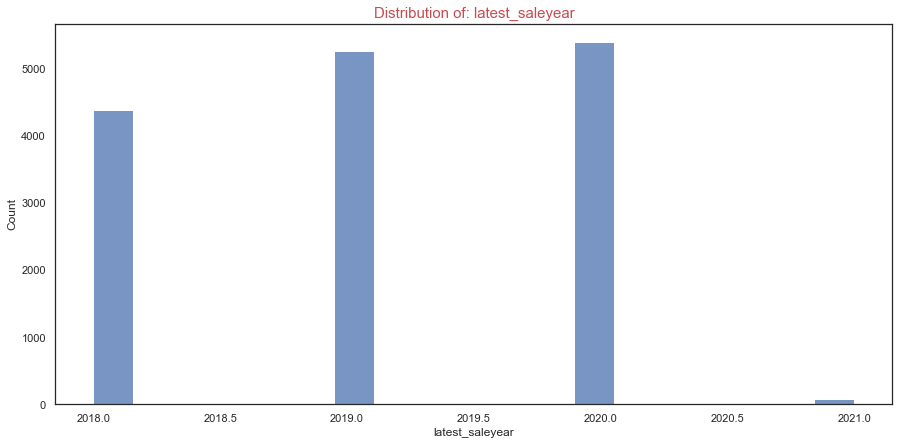

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='livingAreaSqFt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: livingAreaSqFt')

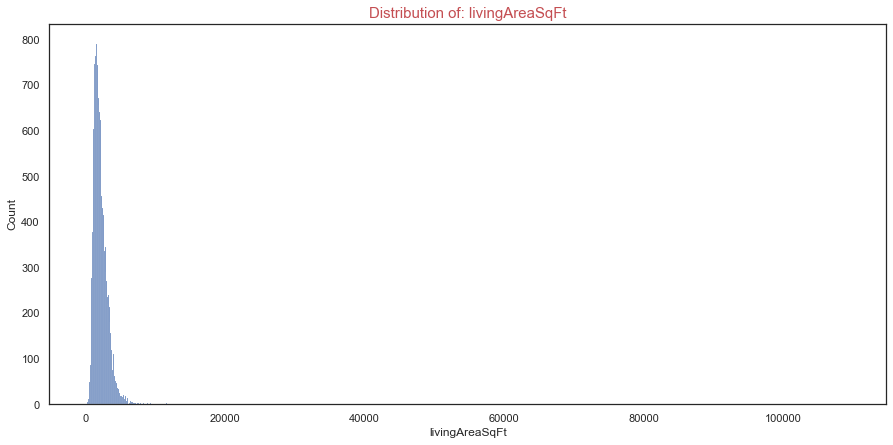

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='numOfBathrooms', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: numOfBathrooms')

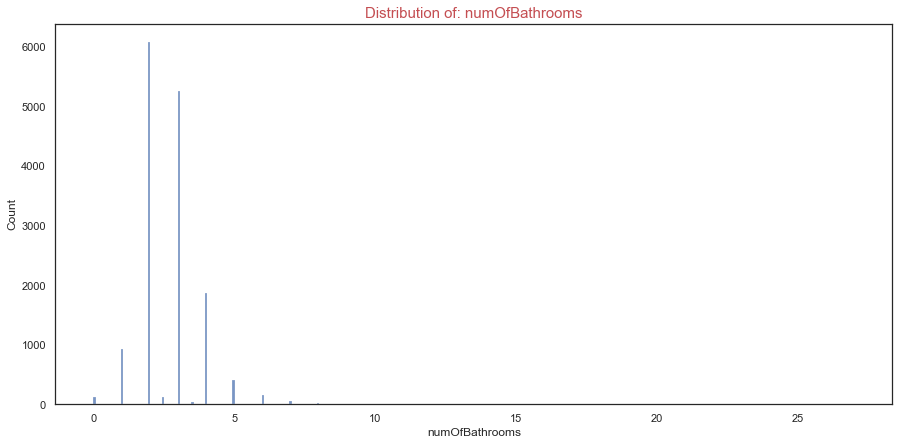

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='numOfBedrooms', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: numOfBedrooms')

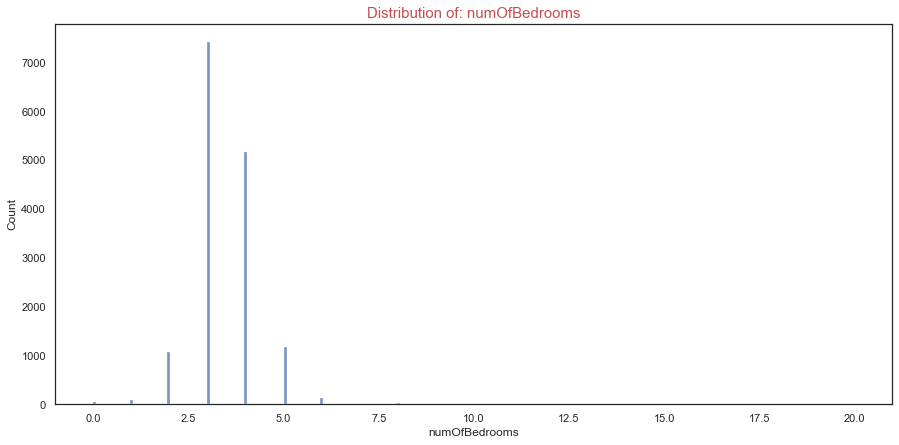

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='numOfStories', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: numOfStories')

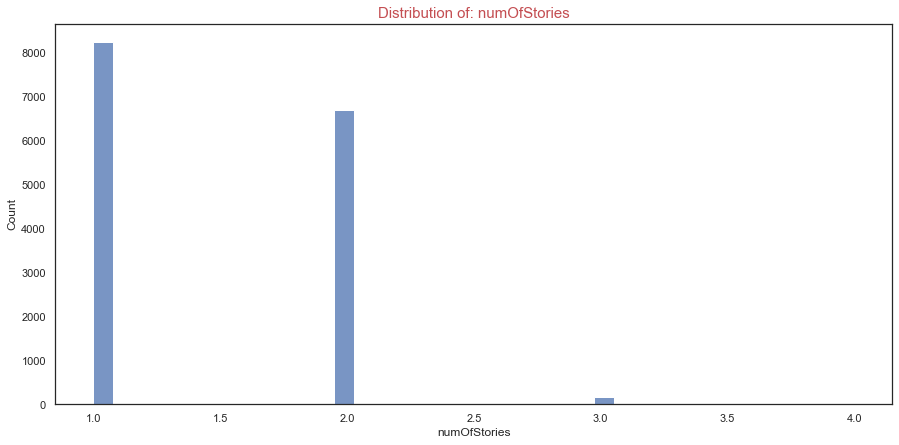

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='home_age', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: home_age')

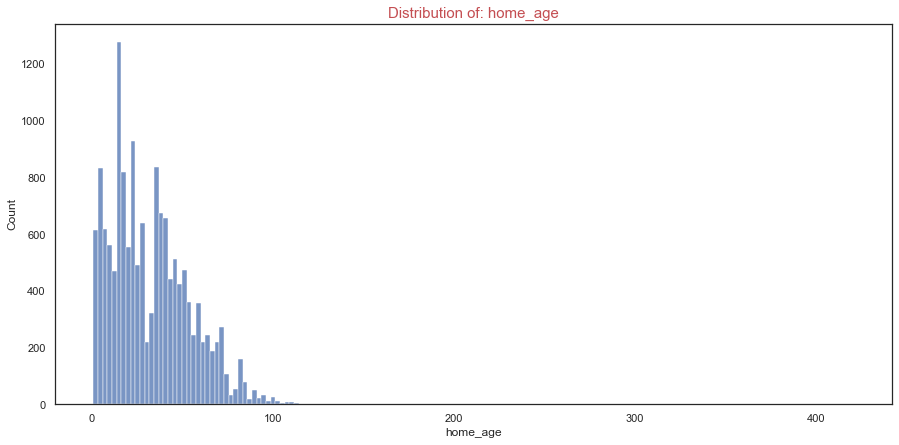

In [20]:
# plot histogram for numerical data types to see outliers and distribution

sns.set(style='white')

for col in numeric_cols:
    plt.figure(figsize=(15,7))
    sns.histplot(data = homes, x = col, color = 'b')
    plt.title(f'Distribution of: {col}', fontdict = {'color':'r','fontsize':15})
    plt.show();

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='zipcode'>

Text(0.5, 1.0, 'Box Plot of: zipcode')

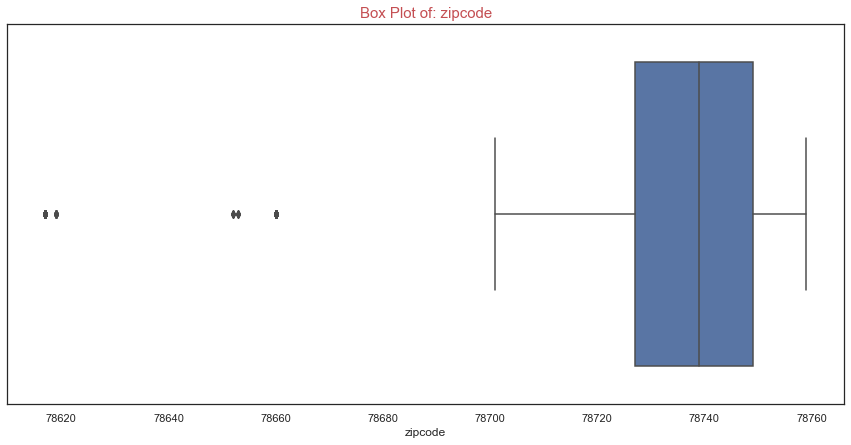

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='propertyTaxRate'>

Text(0.5, 1.0, 'Box Plot of: propertyTaxRate')

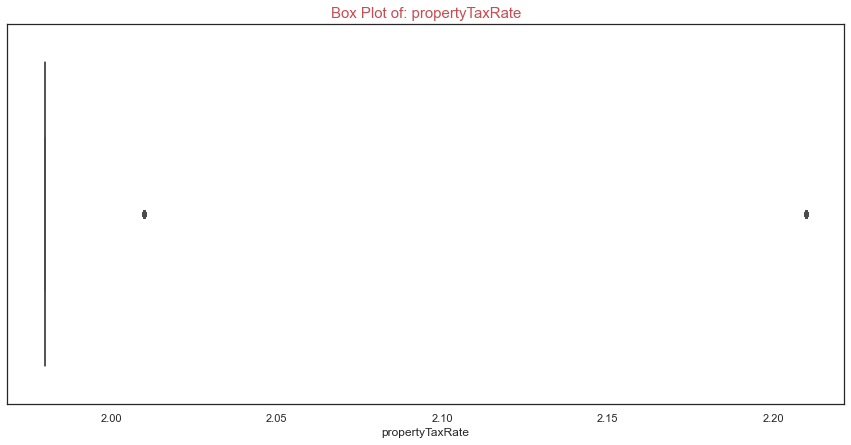

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='garageSpaces'>

Text(0.5, 1.0, 'Box Plot of: garageSpaces')

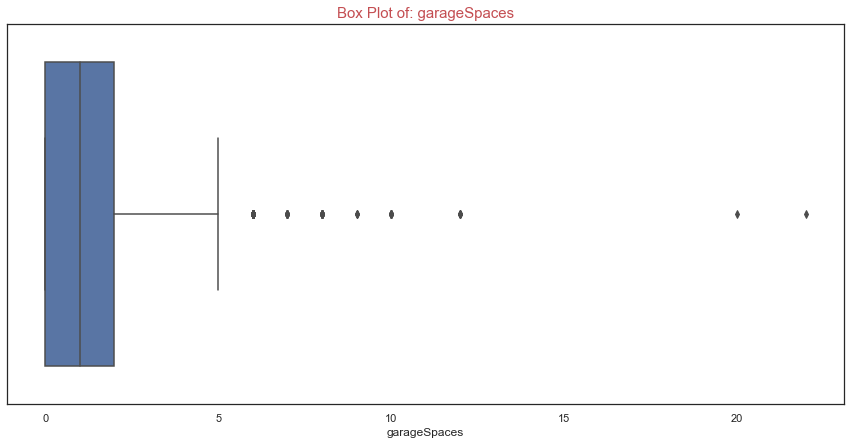

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='parkingSpaces'>

Text(0.5, 1.0, 'Box Plot of: parkingSpaces')

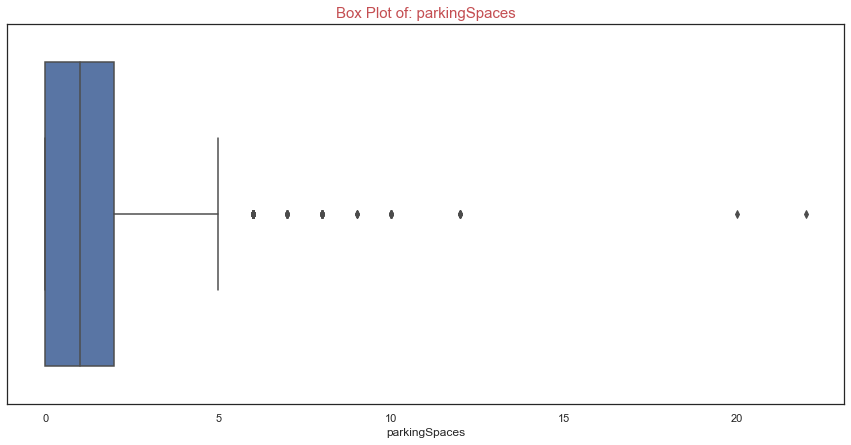

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='yearBuilt'>

Text(0.5, 1.0, 'Box Plot of: yearBuilt')

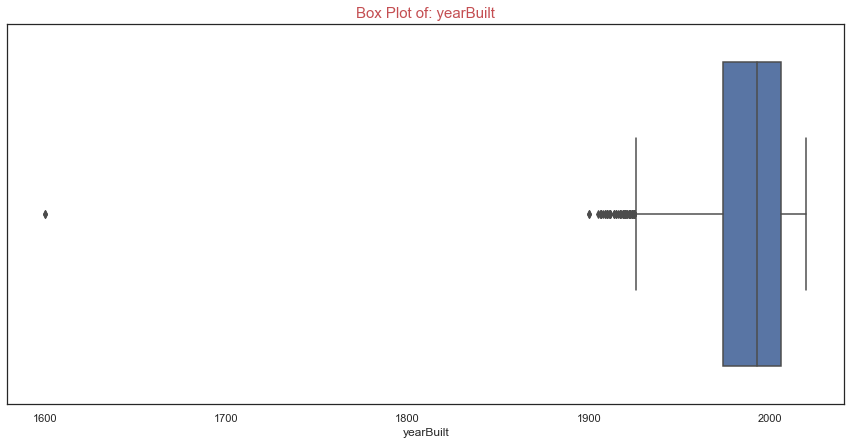

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='latestPrice'>

Text(0.5, 1.0, 'Box Plot of: latestPrice')

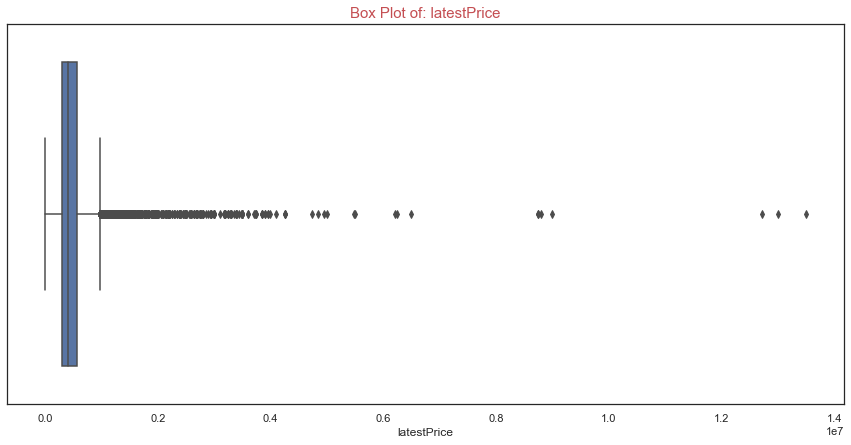

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='numPriceChanges'>

Text(0.5, 1.0, 'Box Plot of: numPriceChanges')

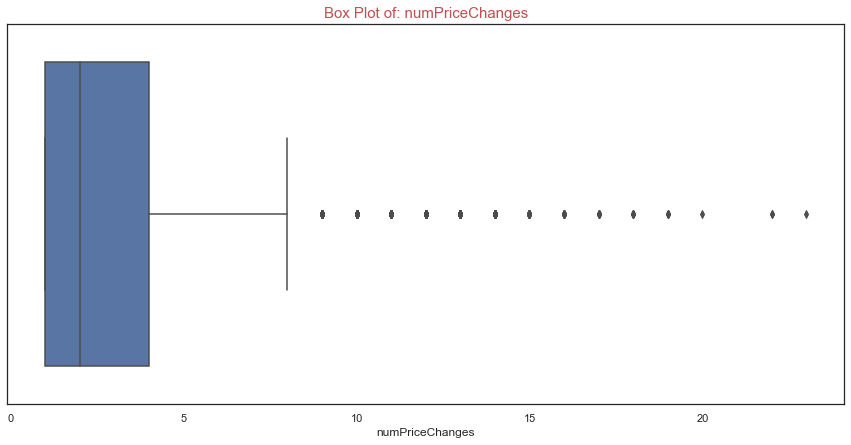

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='latest_saleyear'>

Text(0.5, 1.0, 'Box Plot of: latest_saleyear')

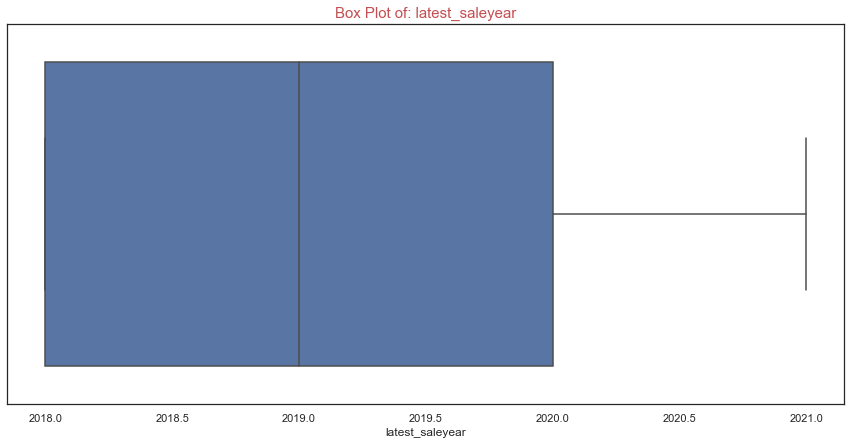

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='livingAreaSqFt'>

Text(0.5, 1.0, 'Box Plot of: livingAreaSqFt')

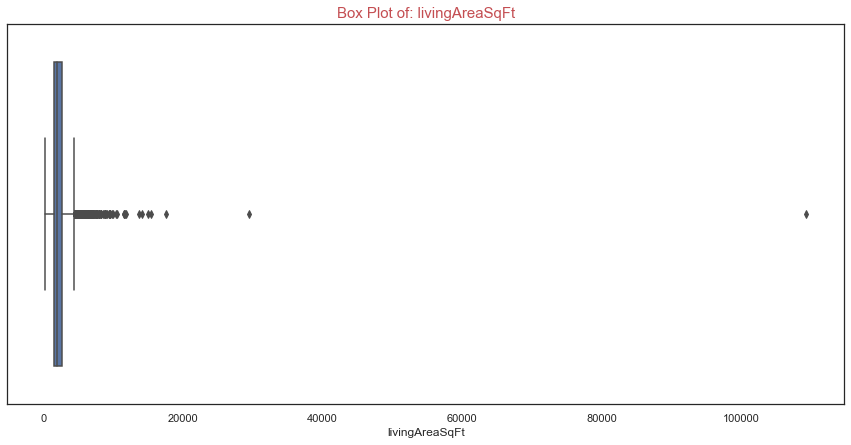

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='numOfBathrooms'>

Text(0.5, 1.0, 'Box Plot of: numOfBathrooms')

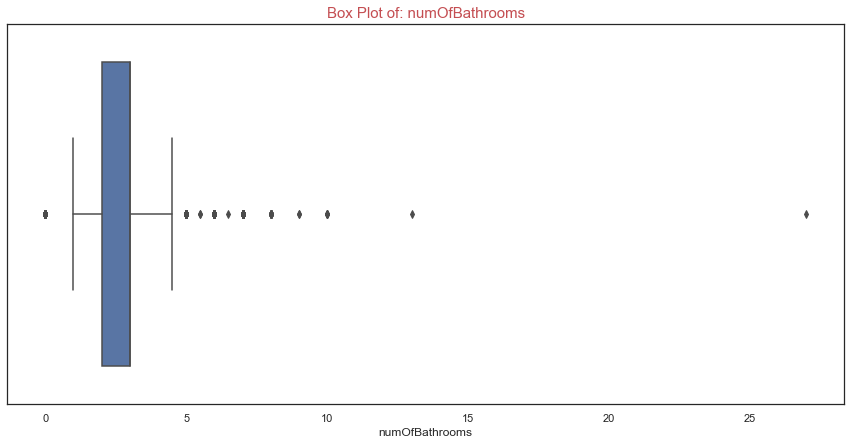

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='numOfBedrooms'>

Text(0.5, 1.0, 'Box Plot of: numOfBedrooms')

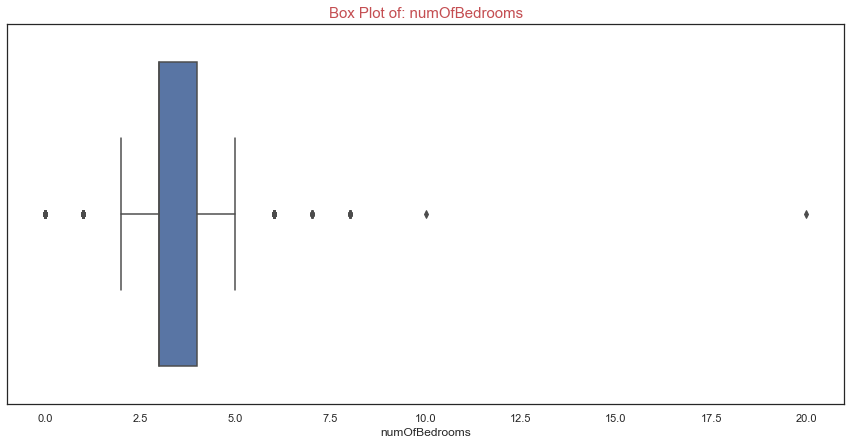

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='numOfStories'>

Text(0.5, 1.0, 'Box Plot of: numOfStories')

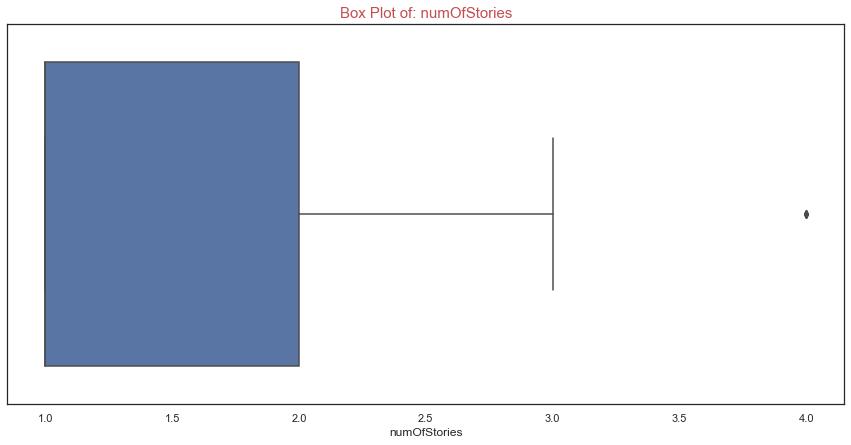

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='home_age'>

Text(0.5, 1.0, 'Box Plot of: home_age')

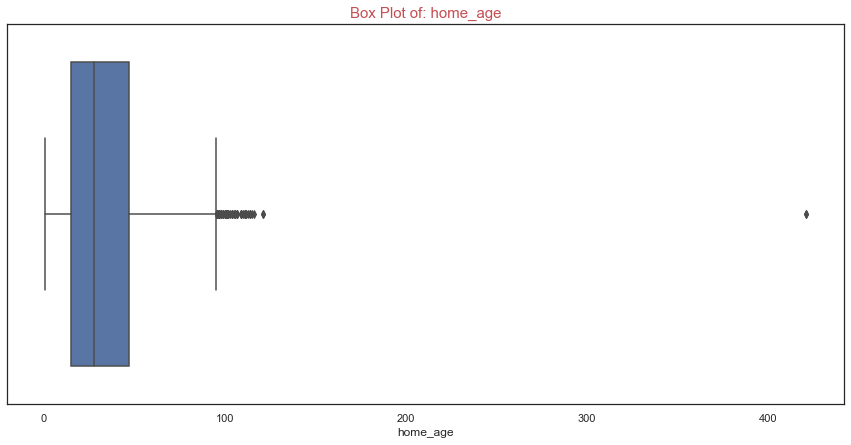

In [21]:
# plot boxplot for numerical data types to see outliers

sns.set(style='white')

for col in numeric_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(data = homes, x = col, color = 'b')
    plt.title(f'Box Plot of: {col}', fontdict = {'color':'r','fontsize':15})
    plt.show();

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='lotSizeSqFt'>

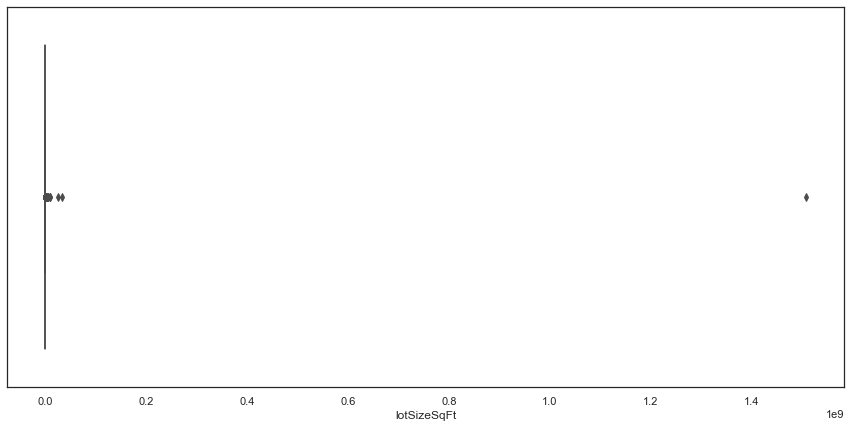

In [22]:
plt.figure(figsize=(15,7))
sns.boxplot(data = homes, x = 'lotSizeSqFt', color = 'b')

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='total_area_sqft'>

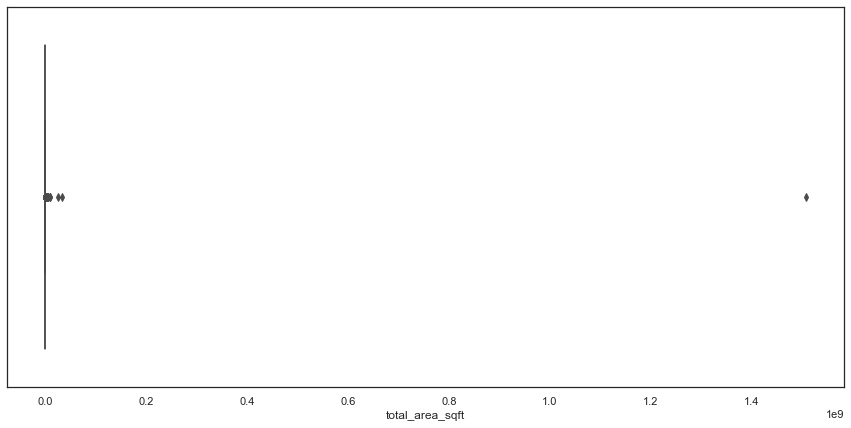

In [23]:
plt.figure(figsize=(15,7))
sns.boxplot(data = homes, x = 'total_area_sqft', color = 'b')

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='city', ylabel='count'>

Text(0.5, 1.0, 'Box Plot of: city')

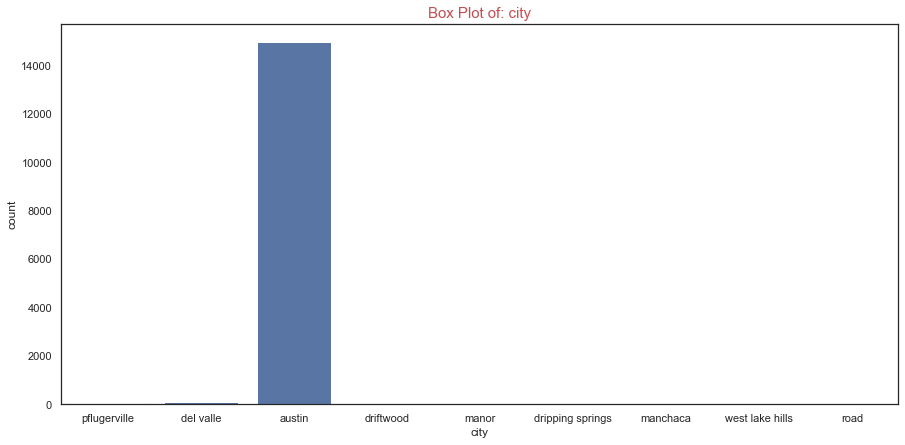

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='hasAssociation', ylabel='count'>

Text(0.5, 1.0, 'Box Plot of: hasAssociation')

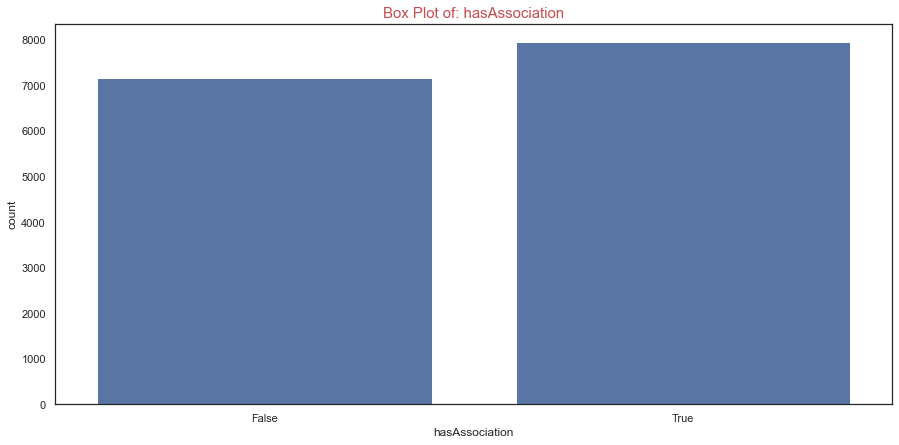

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='hasCooling', ylabel='count'>

Text(0.5, 1.0, 'Box Plot of: hasCooling')

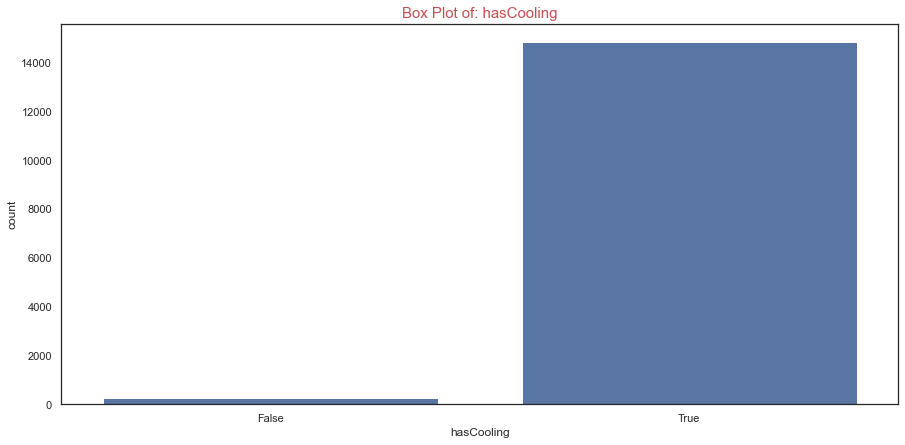

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='hasGarage', ylabel='count'>

Text(0.5, 1.0, 'Box Plot of: hasGarage')

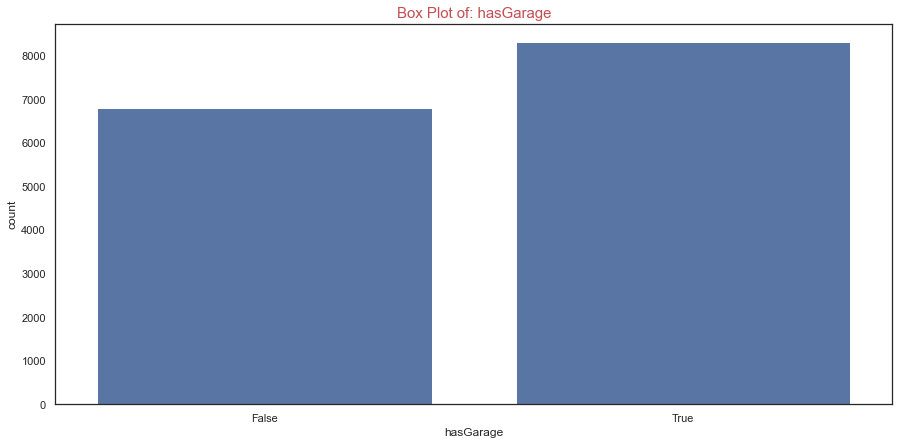

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='hasHeating', ylabel='count'>

Text(0.5, 1.0, 'Box Plot of: hasHeating')

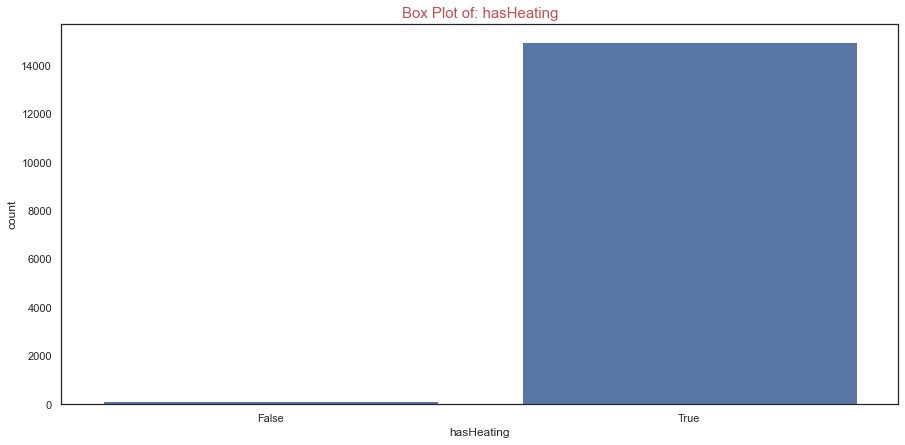

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='hasSpa', ylabel='count'>

Text(0.5, 1.0, 'Box Plot of: hasSpa')

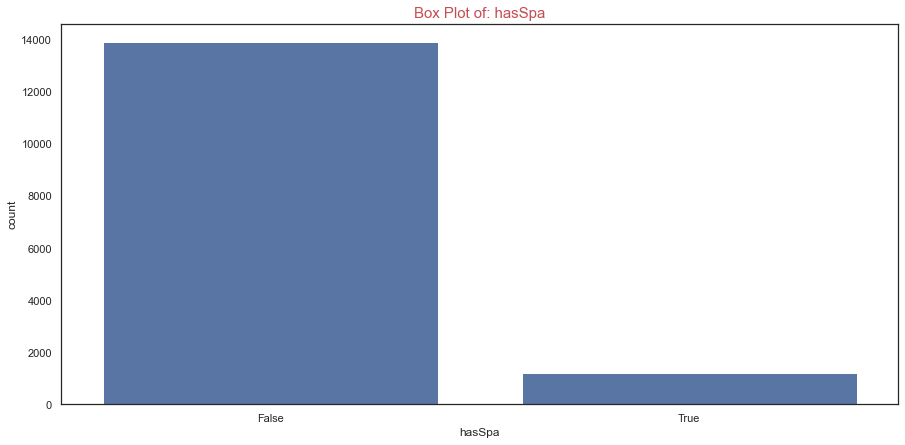

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='hasView', ylabel='count'>

Text(0.5, 1.0, 'Box Plot of: hasView')

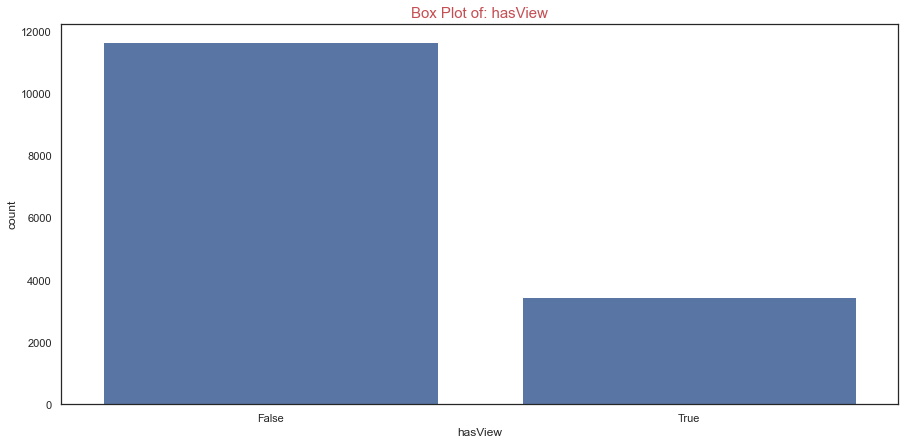

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='homeType', ylabel='count'>

Text(0.5, 1.0, 'Box Plot of: homeType')

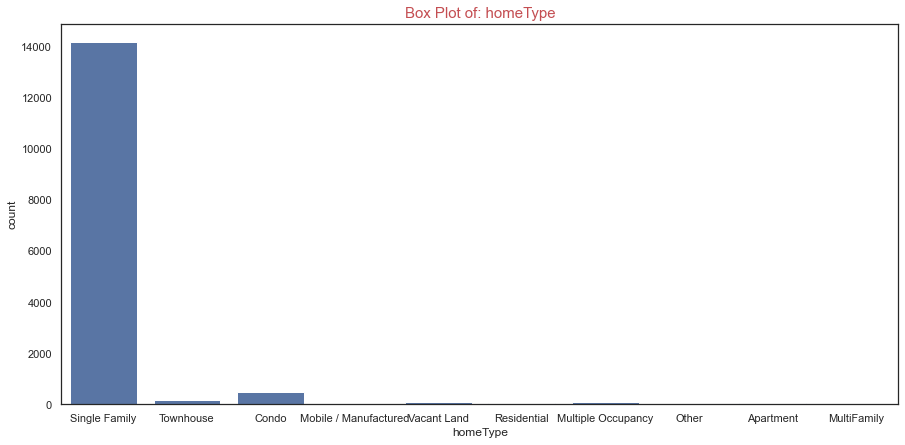

In [24]:
# plot barchart for categorical data types to see outliers

sns.set(style='white')

for col in cat_cols:
    plt.figure(figsize=(15,7))
    sns.countplot(data = homes, x = col, color = 'b')
    plt.title(f'Box Plot of: {col}', fontdict = {'color':'r','fontsize':15})
    plt.show();

#### Based on above histograms and box plot we can see few columns have outliers, The outliers in each column as below - 
1. garageSpaces - There are values in garage space with more than 6, so we are going to remove them
2. parkingSpaces - There are values in garage space with more than 6, so we are going to remove them
3. yearBuilt - there some houses with year built prior to 1900, it's incorrect values so we are going to remove them
4. latestPrice - There are houses with price above 1.5M, we are going to remove prices above 500K
5. livingAreaSqFt - Houses with living area above 20K are very few and need to be removed
6. numOfBathrooms - There are few houses with bathrooms more than 8, so we are going to remove them
7. numOfBedrooms - There are few houses with bedrooms more than 8, so we are going to remove them
8. home_age - There are houses with age above 100 years and we need to remove them

#### Based on Bar Charts for categorical columns we can say - 

1. homeType - The majority home are single family and rest are very few, we dont have balanced classes here so considering model only for single family, we are going to remove all other home types.
2. city - The majority data is for Austin city and very few data for other cities, primarily this data is for austin city so we are going to remove other cities.
3. All other boolean features dont have any other valye than 0 & 1 so we are going to keep them as is.

### Handle outliers or bad data:

##### Numerical Features:

In [25]:
# remove garage spaces and parking spaces 6 and above

homes = homes.loc[(homes.loc[:,'garageSpaces'] < 6)&(homes.loc[:,'parkingSpaces'] < 6) 
          & (homes.loc[:,'yearBuilt'] > 1920) & (homes.loc[:,'latestPrice'] < 1500000)    # remove built year prior to 1920 and price above 1.5M
         & (homes.loc[:,'livingAreaSqFt'] <= 20000) & (homes.loc[:,'numOfBathrooms']<8)   # remove living area sq ft above 20K and bedromm above 8
         & (homes.loc[:,'numOfBedrooms']<8) & (homes.loc[:,'home_age'] < 100)]    # remove bedromms above 8 and home age above 100 yrs old

In [26]:
# display shape and head of the data set after handling outliers

homes.shape
homes.head()

(14522, 24)

,city,streetAddress,zipcode,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,...,latestPrice,numPriceChanges,latest_saleyear,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories,total_area_sqft,home_age
0,pflugerville,14424 Lake Victor Dr,78660.0,1.98,2,True,True,True,True,False,...,305000,5,2019,6011.0,2601,3.0,4,2,8612.0,9
1,pflugerville,1104 Strickling Dr,78660.0,1.98,2,True,True,True,True,False,...,295000,1,2020,6185.0,1768,2.0,4,1,7953.0,8
2,pflugerville,1408 Fort Dessau Rd,78660.0,1.98,0,True,True,False,True,False,...,256125,1,2019,7840.0,1478,2.0,3,1,9318.0,3
3,pflugerville,1025 Strickling Dr,78660.0,1.98,2,True,True,True,True,False,...,240000,4,2018,6098.0,1678,2.0,3,1,7776.0,8
4,pflugerville,15005 Donna Jane Loop,78660.0,1.98,0,True,True,False,True,False,...,239900,3,2018,6708.0,2132,3.0,3,2,8840.0,19


### Data Formatting:

1. zicode - It is float data type, change data type from float to integer
2. All Boolean Features - Convert them into 0 and 1
3. latestPrice - This shows actual dollar amount, change it to thousand dollars by dividing by 1K
4. livingAreaSqFt - It is in integer data type, change it to float from integer
5. homeType - It is categorical data type , change it to numerical by encoding the labels

In [27]:
# change data type

homes['zipcode'] = homes.zipcode.astype('int')

# convert boolean to numeric

homes['hasAssociation'] = homes['hasAssociation'].astype('int')
homes['hasCooling'] = homes['hasCooling'].astype('int')
homes['hasGarage'] = homes['hasGarage'].astype('int')
homes['hasHeating'] = homes['hasHeating'].astype('int')
homes['hasSpa'] = homes['hasSpa'].astype('int')
homes['hasView'] = homes['hasView'].astype('int')

# convert latestsale price to in 1k dollars

homes['latestPrice'] = homes['latestPrice']/1000

# change living area column to float

homes['livingAreaSqFt'] = homes['livingAreaSqFt'].astype('float')

#  change homeType to numeric
lc = LabelEncoder()

homes['homeType'] = lc.fit_transform(homes['homeType'])

In [28]:
# display shape and head of the data set

homes.shape
homes.head()

(14522, 24)

,city,streetAddress,zipcode,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,...,latestPrice,numPriceChanges,latest_saleyear,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories,total_area_sqft,home_age
0,pflugerville,14424 Lake Victor Dr,78660,1.98,2,1,1,1,1,0,...,305.000,5,2019,6011.0,2601.0,3.0,4,2,8612.0,9
1,pflugerville,1104 Strickling Dr,78660,1.98,2,1,1,1,1,0,...,295.000,1,2020,6185.0,1768.0,2.0,4,1,7953.0,8
2,pflugerville,1408 Fort Dessau Rd,78660,1.98,0,1,1,0,1,0,...,256.125,1,2019,7840.0,1478.0,2.0,3,1,9318.0,3
3,pflugerville,1025 Strickling Dr,78660,1.98,2,1,1,1,1,0,...,240.000,4,2018,6098.0,1678.0,2.0,3,1,7776.0,8
4,pflugerville,15005 Donna Jane Loop,78660,1.98,0,1,1,0,1,0,...,239.900,3,2018,6708.0,2132.0,3.0,3,2,8840.0,19


The csv file data is cleaned for missing values, duplicates, formatted features to appropriate data type and added and removed few features, this data is ready for next phase of DS cycle.

## END